In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date, datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math

sns.set()
%matplotlib inline

In [2]:
path_csv_us500 = "../csv_date/ES=F.csv"
df = pd.read_csv(path_csv_us500, parse_dates=True, index_col=0)

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-24,2447.75,2230.50,2233.25,2438.00,2639522.0,2438.00
2020-03-25,2560.75,2386.00,2442.75,2467.00,3037767.0,2467.00
2020-03-26,2625.75,2402.25,2471.00,2608.00,2413913.0,2608.00
2020-03-27,2634.50,2505.25,2627.75,2524.00,2320755.0,2524.00
2020-03-30,2621.75,2445.00,2459.00,2611.25,1837692.0,2611.25


In [4]:
df["average_value"] = (df["High"] + df["Low"]) / 2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2020-03-24 to 2021-08-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   High           362 non-null    float64
 1   Low            362 non-null    float64
 2   Open           362 non-null    float64
 3   Close          362 non-null    float64
 4   Volume         362 non-null    float64
 5   Adj Close      362 non-null    float64
 6   average_value  362 non-null    float64
dtypes: float64(7)
memory usage: 22.6 KB


In [6]:
Xaxis = df.index
Yaxis = df["average_value"].values

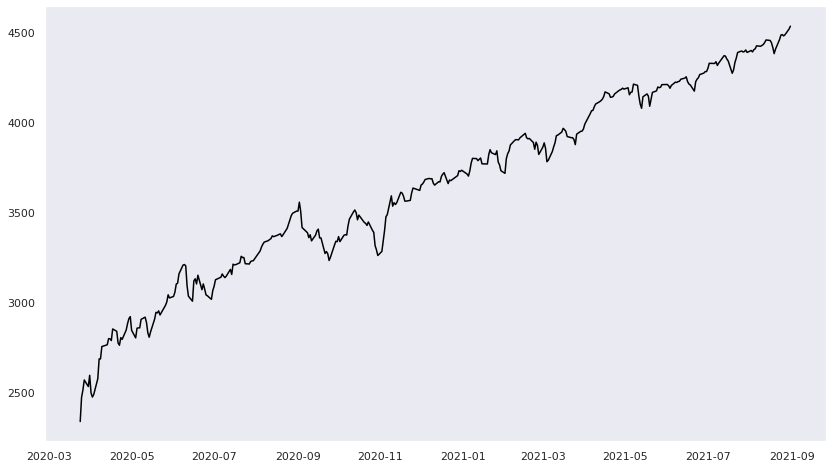

In [7]:
plt.figure(figsize=(14, 8))
plt.plot(Xaxis, Yaxis, 'black')
plt.grid()

In [8]:
df.shape

(362, 7)

In [9]:
# создаем масив numpy размерас с raw значениями дата фрэйма
Xaxis = np.arange(df.shape[0])

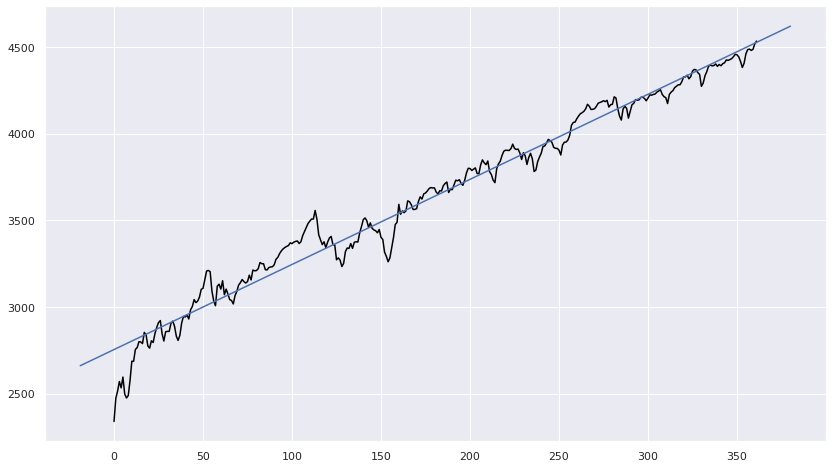

In [10]:
model = LinearRegression()
model.fit(Xaxis.reshape(-1, 1), Yaxis)

# Прорисовываем наш график
plt.figure(figsize=(14, 8))
plt.plot(Xaxis, Yaxis, c='black')

# Узнаем размеры нашего графика
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(math.floor(xlim[0]), math.ceil(xlim[1]))
yy = np.linspace(math.floor(ylim[0]), math.floor(ylim[1]))

# Рисуем предсказаную модель
y_predict = model.predict(xx.reshape(-1, 1))
plt.plot(xx, y_predict)